In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import fsolve
import scienceplots
plt.style.use(['science','notebook','grid'])
import pandas as pd

In [46]:
Av = 15.71511 #MeV
As = 17.53638 #MeV
Ac = 0.71363 #MeV
Aa = 23.37837 #MeV
Cl = 0.0034
dm = 1.293 #MeV (939.565-938.272)

In [18]:
def y(x):
    return np.sqrt(As/(2*Ac*x*x*x))

In [4]:
def f(x):
    return 0.5/(1 + Ac*x*x/(4*Aa)) - np.sqrt(As/(2*Ac*x*x*x))

In [17]:
sol = root(f,3)
xstable = sol['x'][0]
ystable = y(xstable)

In [34]:
Astable = xstable**3
Zstable = ystable*Astable
(Zstable,Astable)

(27.496349566027305, 61.53372802754275)

In [36]:
print(f'The most stable element is the one with Z = {int(Zstable)} and A = {int(Astable)}.')

The most stable element is the one with Z = 27 and A = 61.


In [47]:
def g(S,pF):
    x,y = S
    eq1 = - As/x**2 + 2*(Ac - Cl*pF)*x*y*y
    eq2 = -dm + 2*(Ac - Cl*pF)*x*x*y - 4*Aa*(1-2*y) + np.cbrt(y)*pF
    return [eq1,eq2]

In [53]:
pf_values = np.linspace(0.1,35,100)

In [58]:
res = []
for pf in pf_values:
    x,y = fsolve(g,(5,5),args=(pf))
    n = pf**3/(3*np.pi**2)
    res.append({'pF': pf, 'n': n, 'x': x, 'y': y})

In [62]:
df = pd.DataFrame(res)

In [63]:
df

,pF,n,x,y
0,0.100000,0.000034,3.909147,0.453627
1,0.452525,0.003130,3.919835,0.452153
2,0.805051,0.017622,3.930565,0.450682
3,1.157576,0.052387,3.941339,0.449214
4,1.510101,0.116305,3.952155,0.447750
...,...,...,...,...
95,33.589899,1279.985628,5.147398,0.327496
96,33.942424,1320.710322,5.163230,0.326317
97,34.294949,1362.289793,5.179130,0.325142
98,34.647475,1404.732921,5.195098,0.323969


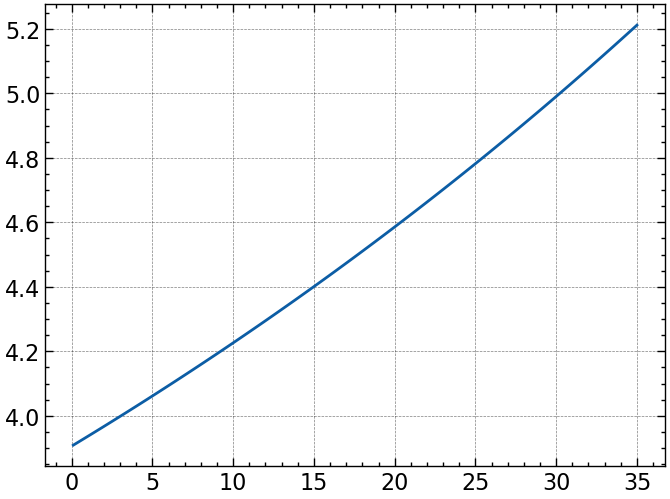

In [66]:
plt.plot(pf_values,df['x'])

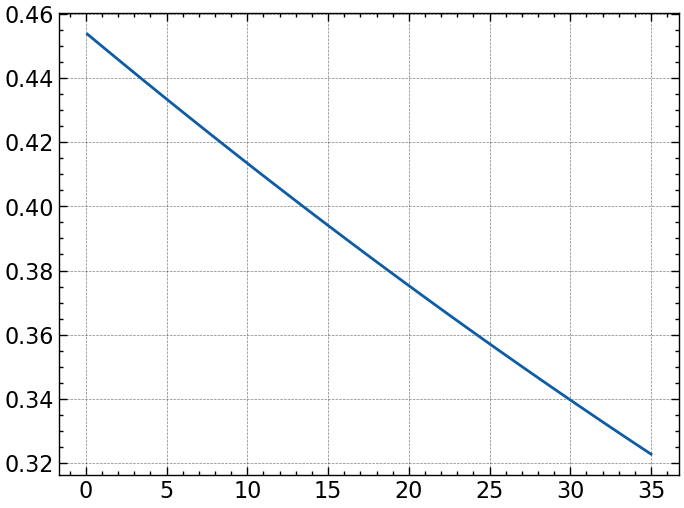

In [68]:
plt.plot(pf_values,df['y'])